# tsam - 2. Example
Usage of the time series aggregation module (tsam) to output the relevant parameters for a design optimization.
<br>Date: 23.03.2018

Author: Leander Kotzur

Import pandas and the relevant time series aggregation class

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import tsam.timeseriesaggregation as tsam
%matplotlib inline

### Input data 

Read in time series from testdata.csv with pandas

In [2]:
raw = pd.read_csv('testdata.csv', index_col = 0)

Transform the index to a datetime index

In [3]:
raw.index = pd.to_datetime(raw.index)

Plot raw data

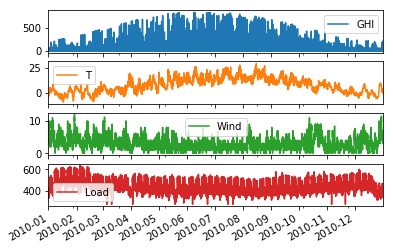

In [14]:
axes = raw.plot(sharex = True, subplots = True)

### Aggregate the data

Initialize an aggregation to typical weeks which integrates the day with the minimal temperature and the day with the maximal load as periods.

In [5]:
aggregation = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 5, hoursPerPeriod = 24*7, 
                                        clusterMethod = 'hierarchical', 
                                        extremePeriodMethod = 'new_cluster_center',
                                       addPeakMin = ['T'], addPeakMax = ['Load'] )

Create the typical periods

In [6]:
typPeriods = aggregation.createTypicalPeriods()

### Show the resulting order  of aggregated periods

Calculates how the original index is represented by the old index

In [7]:
indexMatching = aggregation.indexMatching()

Plot the appearance of the 5+2 aggregated periods in the original timeframe

In [8]:
visDF = pd.DataFrame(0, index = indexMatching.index,
                     columns = aggregation.clusterPeriodIdx)
for col in visDF.columns:
    visDF.loc[indexMatching['PeriodNum']==col,col] = 1

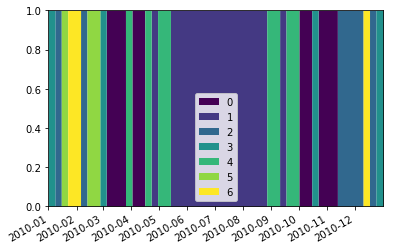

In [9]:
visDF.plot(kind = 'area', cmap = 'viridis', lw = 0, ylim = [0,1])

### Get input for potential energy system optimization

**i. clusterPeriodNoOccur** <br>The number of occurance of each typical period to evaluate it correctly e.g. in the objective function
<br>Note: Period three is only partially evaluated since its appearence in the end of the year exceeds the original time series

In [10]:
aggregation.clusterPeriodNoOccur

{0: 10, 1: 17, 2: 7, 3: 4.1428571428571423, 4: 8, 5: 3, 6: 3}

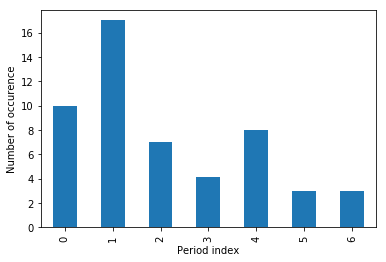

In [11]:
ax = pd.Series(aggregation.clusterPeriodNoOccur).plot(kind='bar')
ax.set(ylabel = 'Number of occurence', xlabel = 'Period index')

**ii. clusterPeriodDict**
<br>The dictionary which describes the aggregated time series by an index touple (period number, time step number) the resulting aggregated time series value for each time series, e.g. 'GHI' 

In [12]:
aggregation.clusterPeriodDict['GHI'][(aggregation.clusterPeriodIdx[3], aggregation.stepIdx[12])]

132.86908868164946

Alternatively this is given as data frame

In [16]:
aggregation.typicalPeriods.head()

GHI         T      Wind        Load
  TimeStep                                     
0 0         0.0  0.220495  0.307872  416.965693
  1         0.0  0.008529  0.000000  409.436001
  2         0.0 -0.203436  0.000000  403.636735
  3         0.0 -0.097453  0.205248  404.487067
  4         0.0 -0.203436  0.307872  410.103512

**iii. clusterOrder**
<br> The order of the typical periods to represent the original time series e.g. to model seasonal storage

In [17]:
aggregation.clusterOrder

array([3, 2, 5, 6, 6, 2, 5, 5, 3, 0, 0, 0, 4, 0, 0, 4, 1, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 4, 0, 0, 3, 0, 0, 0, 2,
       2, 2, 2, 6, 2, 3, 3], dtype=int64)